In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv


In [2]:
df = pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')

# Data Overview

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Column details
To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.

Below are all the columns from the dataset we are using here:

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [9]:
# dropping columns for simplicity
df.drop(columns=['step','isFlaggedFraud'], axis = 1,inplace = True)

# Descriptive Statistics

In [10]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


#  Correlation

In [11]:
df_num = df.select_dtypes(exclude = ['object'])

<Axes: >

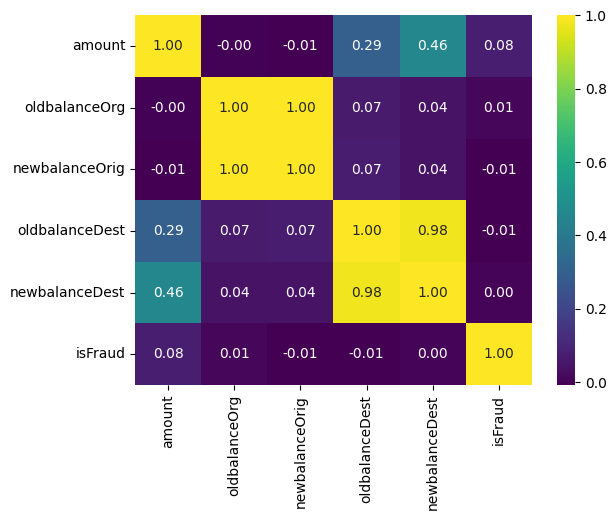

In [12]:
sns.heatmap(df_num.corr(), annot = True, cmap = 'viridis', fmt = '.2f')

new balance and old balance are highly positively correlated as it should be

# Visualization

In [13]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

**Transaction Type**

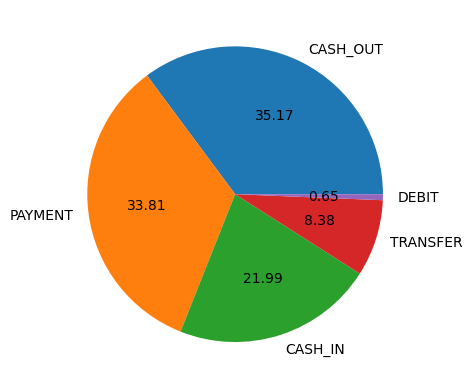

In [14]:
df['type'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.ylabel(None)
plt.show()

**Fraud and Non-Fraudulent dist**

In [15]:
df['isFraud'].value_counts().reset_index()

,isFraud,count
0,0,6354407
1,1,8213


<Axes: xlabel='isFraud', ylabel='count'>

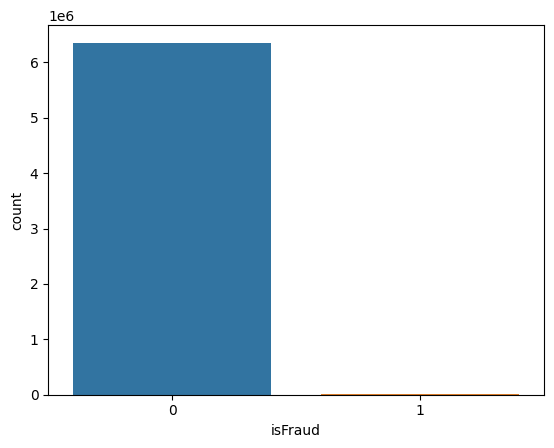

In [16]:
sns.countplot(x = df['isFraud'])

# Model Training

In [17]:
df_new = df.drop(columns=['nameOrig','nameDest'], axis = 1)

In [18]:
df_new.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [19]:
# feature target selection

x = df_new.drop('isFraud', axis = 1)
y = df_new['isFraud']

# **Data Preprocessing**

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

In [21]:
x['type'] = le.fit_transform(x['type'])

In [22]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [23]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.952399,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0.952399,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1.693076,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,-0.528954,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0.952399,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


# Training and Testing data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# 70-30 train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
x_train.shape,x_test.shape

((4453834, 6), (1908786, 6))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
rfc = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

In [29]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rfc.predict(x_test)

# Evaluaing Accuracy

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report, auc

In [32]:
accuracy_score(y_test,y_pred)*100

99.9676234004231

99.67% accuracy but this due to maybe highly imbalanced dataset :/

**Confusion Matrix**

<Axes: >

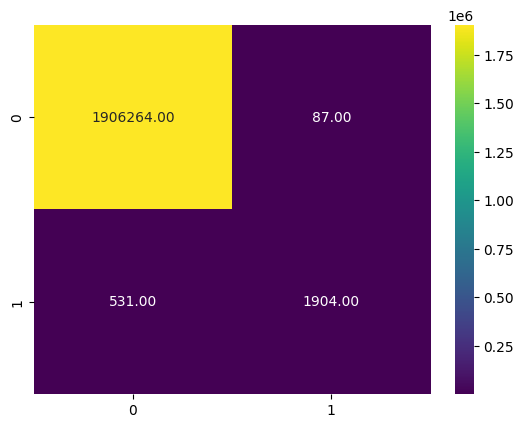

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'viridis', fmt = '.2f')

In [34]:
# Precision recall and F1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.78      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [35]:
# ROC AUC Score
roc_auc_score(y_test,y_pred)*100

89.09422739393375

# Balancing target variable in the master Dataset

**Now Lets fix the master dataset and try to balance it**

In [36]:
import pandas as pd

df_majority = df[df['isFraud'] == 0]
df_minority = df[df['isFraud'] == 1]

# Taking a random sample of 8500 from the majority class
df_majority_sampled = df_majority.sample(n=8500, random_state=42)

# Combine the sampled majority class with the minority class
df_balanced = pd.concat([df_majority_sampled, df_minority])

# Optionally, shuffle the dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [37]:
df_balanced.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,CASH_OUT,38370.82,C544623420,2946.00,0.0,C1413280399,264667.45,303038.27,0
1,CASH_OUT,231137.31,C1077290418,0.00,0.0,C803793969,690622.65,921759.96,0
2,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
3,CASH_OUT,45077.10,C978467011,45077.10,0.0,C809689507,126262.18,171339.29,1
4,CASH_OUT,56888.23,C385055273,56888.23,0.0,C1678539826,0.00,56888.23,1


In [38]:
df_balanced['isFraud'].value_counts()

isFraud
0    8500
1    8213
Name: count, dtype: int64

Now the distribution of fraud and non fraud trabnsactions is somewhat even :)

Lets train the Model with this new data and see if we can get a more realistic test set accuracy 

In [39]:
df_balanced = df_balanced.drop(columns=['nameOrig','nameDest'], axis = 1)

In [40]:
# feature target selection

x = df_balanced.drop('isFraud', axis = 1)
y = df_balanced['isFraud']

In [41]:
x['type'] = le.fit_transform(x['type'])

In [42]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [43]:
# 70-30 train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
rfc = RandomForestClassifier(random_state=1)

In [45]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_pred2 = rfc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred2)*100

99.40173496859109

We still got 99.4 % accuracy with balanced dataset on our test set :)

<Axes: >

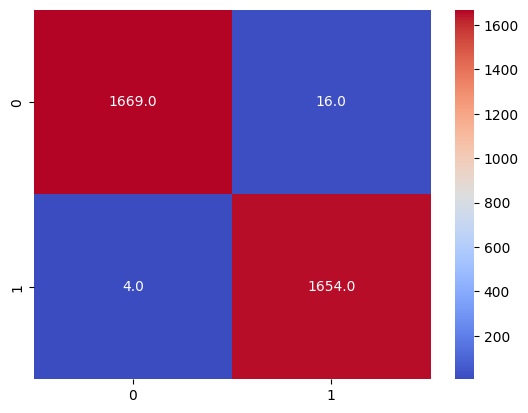

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True, cmap = 'coolwarm', fmt = '.1f')

In [49]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1685
           1       0.99      1.00      0.99      1658

    accuracy                           0.99      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       0.99      0.99      0.99      3343



# ROC Curve

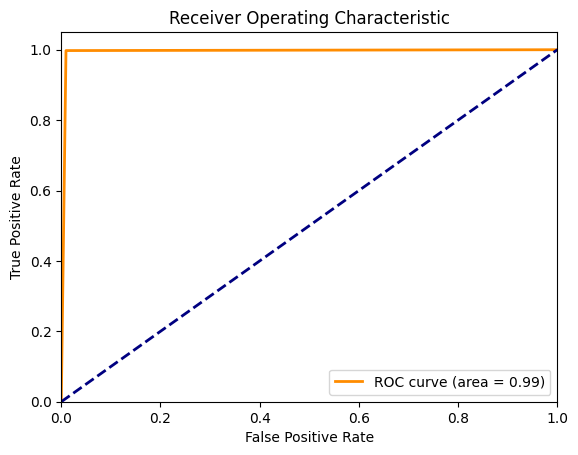

In [50]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()